In [1]:
# imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sales-pred/DigitalAd_dataset.csv


# 1. Problem Statement:

There is Age and Salary given as input, from this have to predict, weather person purchase product or not

Name: Sandip Anap

# 2. Load Data

In [2]:
data = pd.read_csv("/kaggle/input/sales-pred/DigitalAd_dataset.csv")
data.head()

,Age,Salary,Status
0,18,82000,0
1,29,80000,0
2,47,25000,1
3,45,26000,1
4,46,28000,1


# 3. Data Cleaning

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     400 non-null    int64
 1   Salary  400 non-null    int64
 2   Status  400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


Our data has 2 features, `Age` and `Salary` and label is `Status`. There are total 400 samples of data. In Status 1: Purchase and 0: Not Purchase.

In [4]:
data.isna().sum()

Age       0
Salary    0
Status    0
dtype: int64

So, In our data there is no missing, value.

In [5]:
data.dtypes

Age       int64
Salary    int64
Status    int64
dtype: object

Our data all in numeric type so there is no need to type conversion to our data.

# 4. Data Visualizations.

### Age

<Axes: >

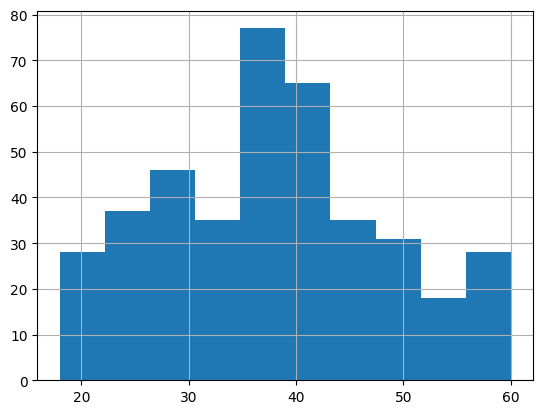

In [6]:
data["Age"].hist()

In [7]:
data["Age"].value_counts()[:4]

Age
35    32
37    20
41    16
42    16
Name: count, dtype: int64

In our data, most of the people belongs to 35 - 45 age group.

### Salary

<Axes: >

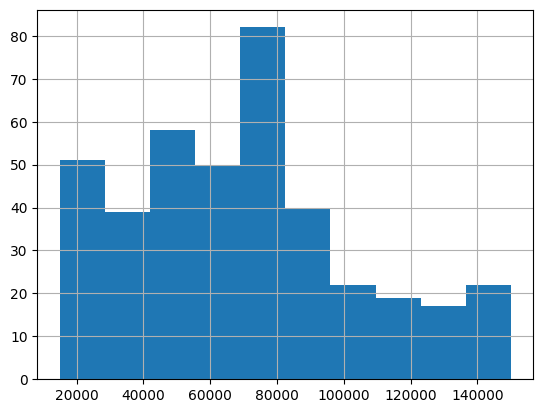

In [8]:
data["Salary"].hist()

In [9]:
data["Salary"].value_counts()[:10]

Salary
72000    12
80000    11
79000    10
75000     9
71000     9
59000     8
43000     7
74000     7
60000     7
55000     7
Name: count, dtype: int64

Many people have there income in between 50,000 - 80,000

### Status

<Axes: >

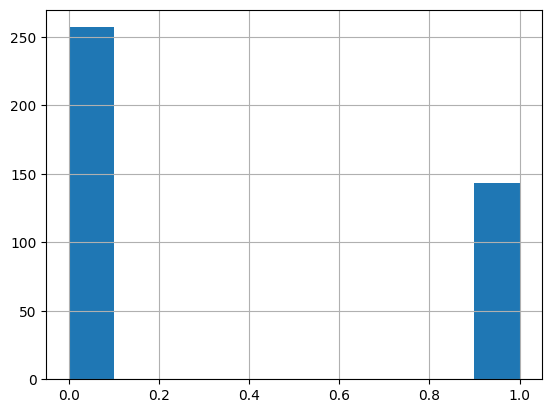

In [10]:
data["Status"].hist()

In [11]:
data.Status.value_counts()

Status
0    257
1    143
Name: count, dtype: int64

In [12]:
data.corr()

,Age,Salary,Status
Age,1.000000,0.155238,0.622454
Salary,0.155238,1.000000,0.362083
Status,0.622454,0.362083,1.000000


(3.5, -0.5)

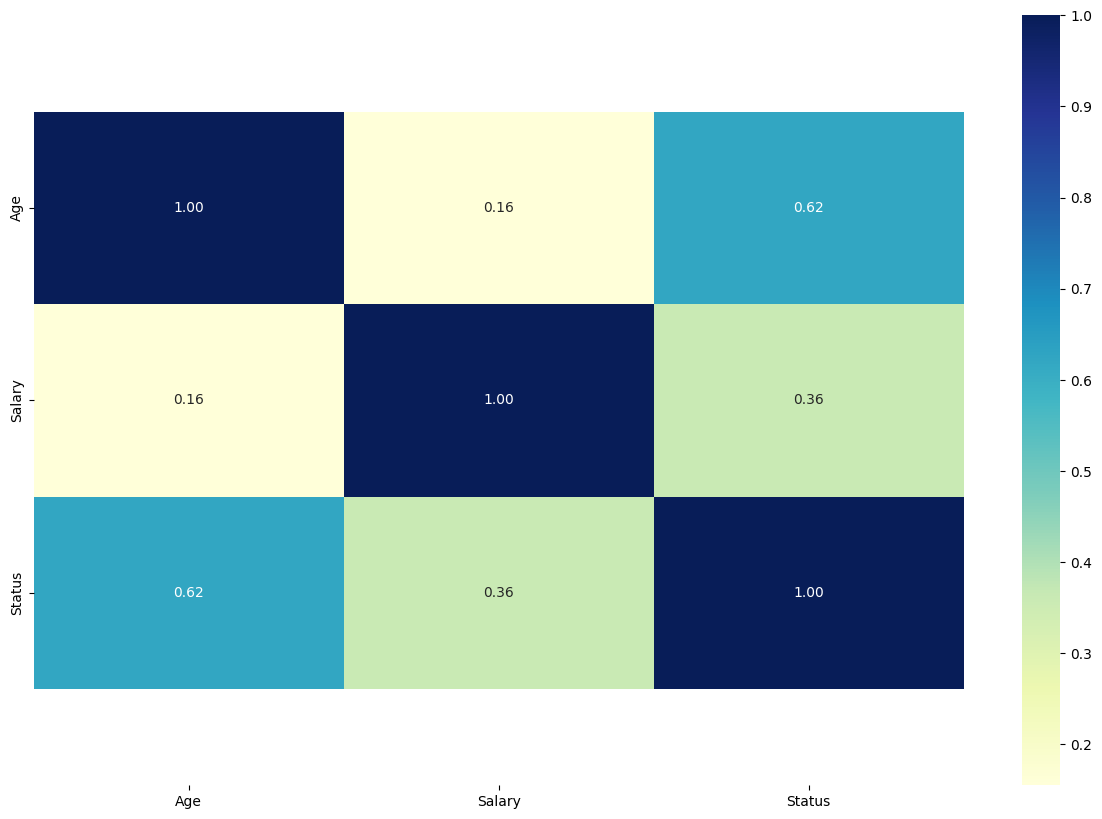

In [13]:
import seaborn as sns
corr_matrix = data.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

Age and Status have strong corelation, it mean as age increase, possibility of purachse is increased.

In our data, out of 400 people, 143 people purchased product.

# 5. Split Data

1. **Features x**: `Age` & `Salary`.
2. **Label y**: `Status`

In [14]:
x = data.drop("Status",axis=1)
x

,Age,Salary
0,18,82000
1,29,80000
2,47,25000
3,45,26000
4,46,28000
...,...,...
395,35,65000
396,26,80000
397,26,52000
398,20,86000


In [15]:
y = data["Status"]
y

0      0
1      0
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: Status, Length: 400, dtype: int64

### Split data into Training data and Test data.

I'm giving 80% data to train set and 20% data to Test set.

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [17]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((320, 2), (80, 2), (320,), (80,))

In [18]:
len(x_train)/len(x)*100

80.0

Above cell validate, our train data set is 80% of total data.

# 6. Feature Scaling:

We scale our data to make all the features contribute equally to the result

**Fit_Transform** - fit method is calculating the mean and variance of each of the features present in our data.

**Transform** - Transform method is transforming all the features using the respective mean and variance, 
We want our test data to be a completely new and a surprise set for our model

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test) 

In [20]:
pd.DataFrame(x_train).head()

,0,1
0,1.151801,-1.414847
1,-0.081213,-0.461018
2,-1.788463,0.463908
3,0.013634,-0.114170
4,0.013634,-0.547729


# 7. Model Traning

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
y_preds = model.predict(x_test)
model.score(x_test,y_test)


0.8875

# 8. Model Evaluation.

In [22]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score, confusion_matrix

In [23]:
confusion_matrix(y_test,y_preds)

array([[53,  6],
       [ 3, 18]])

Here I,m going to create function, to evaluate our model.

In [24]:
def eval_model(y_test,y_preds):
    '''
    This function take input true label and predicted label and 
    calculate accuracy, precision, recall, 
    '''
    print(f"The accuracy of model is {accuracy_score(y_test,y_preds)*100:.2f}%")
    print(f"The precision of model is {precision_score(y_test,y_preds)*100:.2f}%")
    print(f"The recall of model is {recall_score(y_test,y_preds)*100:.2f}%")
    

In [25]:
eval_model(y_test,y_preds)

The accuracy of model is 88.75%
The precision of model is 75.00%
The recall of model is 85.71%


# 9. Hyperparameter Tunning

Logistic regression does not really have any critical hyperparameters to tune.

Sometimes, you can see useful differences in performance or convergence with different solvers (solver).

* solver in [‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’]
* Regularization (penalty) can sometimes be helpful.
 Penalty in [‘none’, ‘l1’, ‘l2’, ‘elasticnet’]

* The C parameter controls the penality strength, which can also be effective. C in [100, 10, 1.0, 0.1, 0.01]

source: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [26]:
gs_grid = {'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'penalty':['none', 'l1', 'l2', 'elasticnet'],
            'C':[100,10,1.0,0.1,0.5,1.5,0.01]
}

In [27]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [28]:
from sklearn.model_selection import GridSearchCV
np.random.seed(42)

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=gs_grid,
                          cv=5,
                          verbose=True)

gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 140 candidates, totalling 700 fits


In [29]:
gs_log_reg.best_params_

{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [30]:
y_preds2 = gs_log_reg.predict(x_test)
eval_model(y_test,y_preds2)

The accuracy of model is 88.75%
The precision of model is 73.08%
The recall of model is 90.48%


By tunning hyperparameter, we've improved accuracy to 85 percet,
Still there are way to improve accuracy by tring other model.

# 10. Prediction on user input.

### *Predicting, wheather new customer with Age & Salary will Buy or Not*


In [31]:
# While saving notebook these input, causing error in code, so i am giving input in cell itself.
# age = int(input("Enter New Customer Age: "))
# salary = int(input("Enter New Customer Salary: "))
age = 55
salary = 35000
newCust = [[age,salary]]
result = gs_log_reg.predict(sc.transform(newCust))
print(result)
if result == 1:
  print("Customer will Buy")
else:
  print("Customer won't Buy")

[1]
Customer will Buy


 I would like to thanks **NIKHIL DHANANKAM** for data, **Worriers Way** for project idea.  

##### As I am  a beginner in  ML, please comment your suggestions, improvements, or corrections